In [ ]:
#!pip install --upgrade gdown

file : https://drive.google.com/file/d/1layCceJUFuu48LMaPvmEbv7h_YodmY5w

In [ ]:
!gdown 1layCceJUFuu48LMaPvmEbv7h_YodmY5w

Downloading...
From: https://drive.google.com/uc?id=1layCceJUFuu48LMaPvmEbv7h_YodmY5w
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 76.6MB/s]


Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings("ignore")


Reading the file

In [ ]:
df = pd.read_csv('netflix.csv')

**Problem Statement:**

---
1)
Perform exploratory data analysis on Neflix dataset and come up with the meaningful inights that will be benificial to the business

---



In [ ]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1291,s1292,Movie,Love,Khalid Rahman,"Shine Tom Chacko, Rajisha Vijayan, Gokulan, Su...",India,"February 19, 2021",2020,TV-14,91 min,"Dramas, Independent Movies, International Movies",The troubling inner workings of a toxic marria...
5348,s5349,TV Show,Close Your Eyes Before It’s Dark,NaN,"Bryan Shu-Hao Chang, Jian Man-shu, Yen Tsao, S...",Taiwan,"August 1, 2017",2016,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","While vacationing at a mountain cabin, a group..."
6095,s6096,Movie,After Porn Ends,Bryce Wagoner,NaN,United States,"May 27, 2019",2012,NR,93 min,Documentaries,This documentary explores the careers of some ...
7473,s7474,Movie,Mission: Destroy Love,Osman Ali,"Bront Palarae, Maya Karin, Remy Ishak, Izara A...",Malaysia,"August 7, 2017",2014,TV-PG,93 min,"Comedies, International Movies, Romantic Movies",Two strangers meet by chance on a trip to Thai...
1945,s1946,Movie,Manorama Six Feet Under,Navdeep Singh,"Abhay Deol, Gul Panag, Raima Sen, Sarika, Kulb...",India,"September 28, 2020",2007,TV-14,129 min,"Dramas, International Movies, Thrillers",A government employee and aspiring crime write...


---

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

---

In [ ]:
df.shape

(8807, 12)

There are total of 8807 movies and TV shows

In [ ]:
#finding the non-null , count and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#finding the null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

---
It shows there are null values

director          : 2634

cast              : 825

country           : 831

date_added        : 10

rating            : 4

duration          : 3

---

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


There are movies and TV shows with release year ranging from 1925 to 2021

In [ ]:
#details about the categorical data
df.describe(include=['O'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


---

# **3)Non-Graphical Analysis: Value counts and unique attributes**

---

***show_id***

In [ ]:
df['show_id'].nunique()

8807

-- Every movie or TV show is uniquely identified with **show_id**

***Type***

In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

-- All the data is categorized into either movie or tv show

***Title***

In [ ]:
df['title'].nunique()

8807

-- There are no titles with repetitive names

***director***

In [ ]:
df['director'].nunique()

4528

-- There are 4528 directors

***country***

In [ ]:
df['country'].nunique()

748

-- There is something wrong here number seems to be more than the countries in the entire world

In [ ]:
df['country'][2006]

'United Kingdom, China'

-- Here in a row it seems every country it released is seperated by a comma

lets copy the dataset and explode the country column to find the number of unique countries

In [ ]:
df_country = df.copy()

In [ ]:
df_country.shape

(8807, 12)

In [ ]:
df_country['country'] = df_country['country'].str.split(',')

-- Here we exploded the dataset witht the country column to check the number of countries

In [ ]:
df_country = df_country.explode(column='country')

In [ ]:
df_country['country'] = df_country['country'].str.strip()

In [ ]:
df_country['country'].nunique()

123

-- In the country column there are a total of 123 unique values 121 are unique countries and it also contains missing values and '' values
  

***date_added***

converting object to datetime

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed')

In [ ]:
print(df['date_added'].max(),df['date_added'].min())

2021-09-25 00:00:00 2008-01-01 00:00:00


the latest and the oldest dates that added are ⁉

oldest : 2008-01-01

latest : 2021-09-25

***rating***

In [ ]:
df['rating'].nunique()

17

In [ ]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

-- It seems there are three unidentified rating type. that is the unmatched data need to remove that

***duration***

In [ ]:
df['duration'].nunique()

220

In [ ]:
df['duration'].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

-- duration data contains minutes if it is less than one season if it contains seasons it is mentioned as number of seasons

***listed_in***

listed_in contains information about the genres the movie is related to

In [ ]:
df_listed = df.copy()

In [ ]:
df_listed['listed_in'] = df_listed['listed_in'].str.split(',')

In [ ]:
df_listed = df_listed.explode(column='listed_in')

In [ ]:
df_listed['listed_in'] = df_listed['listed_in'].str.strip()

In [ ]:
df_listed['listed_in'].value_counts()

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

-- It seems there are 2752 movies that are related to international movies genre in the Netflix

***description***


It contains breif about the movie

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


---

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

---

Copying the data to perform visual analytics

In [ ]:
df_visual = df.copy()

## Preprocessing of data

In [ ]:
df_visual['lead_actor'] = df_visual['cast'].str.split(',')

creating a new column with the first value in the cast as lead actor

In [ ]:
df_visual['lead_actor'] = df_visual['lead_actor'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

In [ ]:
df_visual['listed_in'] = df_visual['listed_in'].str.split(',')

In [ ]:
df_genre = df_visual.explode(column='listed_in')

In [ ]:
df_genre['listed_in'] = df_genre['listed_in'].str.strip()

In [ ]:
df_visual['country'] = df_visual['country'].str.split(',')

In [ ]:
df_con = df_visual.explode(column='country')

In [ ]:
df_con['country'] = df_con['country'].str.strip()

Here we created two dataframes

1) df_genre  ----- exploded with the listed_in

2) df_con    ----- exploded with country column

To perform analysis based on the different visualizations i created these two extra dataframes

## **UNIVARIATE ANALYSIS**

-------------------

How many movies and TV Shows are there in the dataset?

---

In [ ]:
df_visual['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

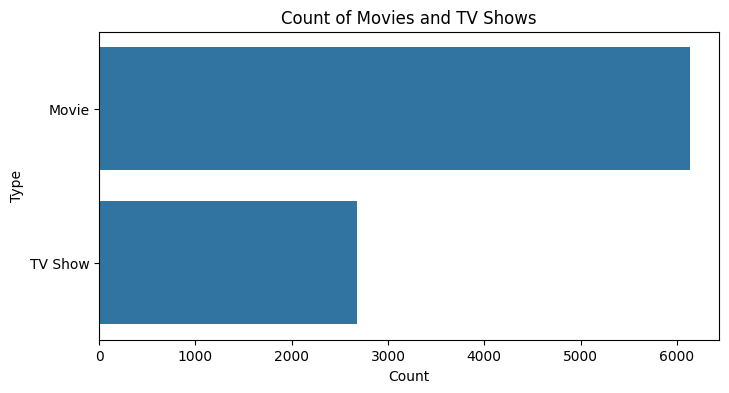

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(df_visual['type'])
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Count of Movies and TV Shows')
plt.show()

Who are top 10 directors in terms of frequency for movies and TV shows?

---

There are total of 4528 directors so we are limiting to 10 directors

In [ ]:
directors_tv_movies = df_visual['director'].value_counts()[:10]
directors_tv_movies

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

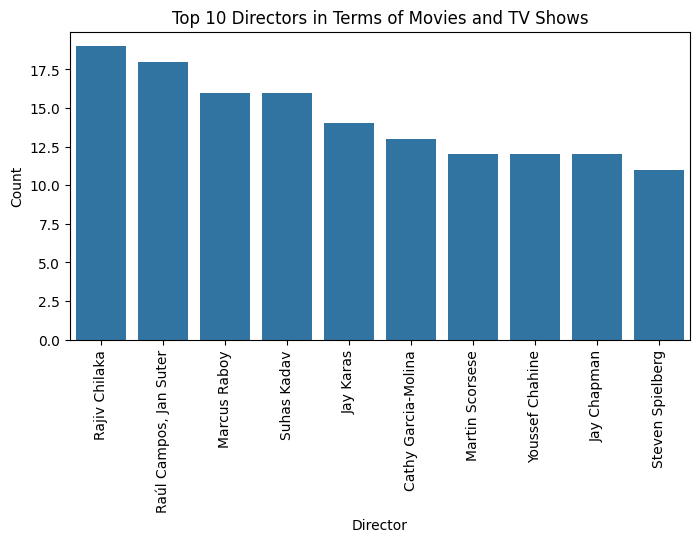

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=directors_tv_movies.index, y=directors_tv_movies.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Top 10 Directors in Terms of Movies and TV Shows')
plt.show()

Now we will deal with movies and TV shows seperately and find the top 10 directors in terms of frequency

In [ ]:
directors_tv = df_visual[df_visual['type']=='TV Show']['director'].value_counts()[:10]
directors_tv

director
Alastair Fothergill    3
Rob Seidenglanz        2
Hsu Fu-chun            2
Iginio Straffi         2
Shin Won-ho            2
Ken Burns              2
Stan Lathan            2
Thomas Astruc          1
Quek Shio-chuan        1
Elías León             1
Name: count, dtype: int64

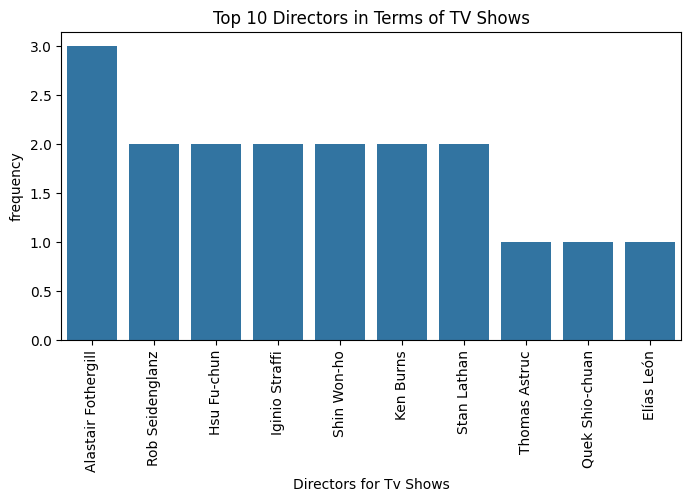

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=directors_tv.index, y=directors_tv.values)
plt.xlabel('Directors for Tv Shows')
plt.ylabel('frequency')
plt.xticks(rotation = 90)
plt.title('Top 10 Directors in Terms of TV Shows')
plt.show()

In [ ]:
directors_Movie = df_visual[df_visual['type']=='Movie']['director'].value_counts()[:10]
directors_Movie

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

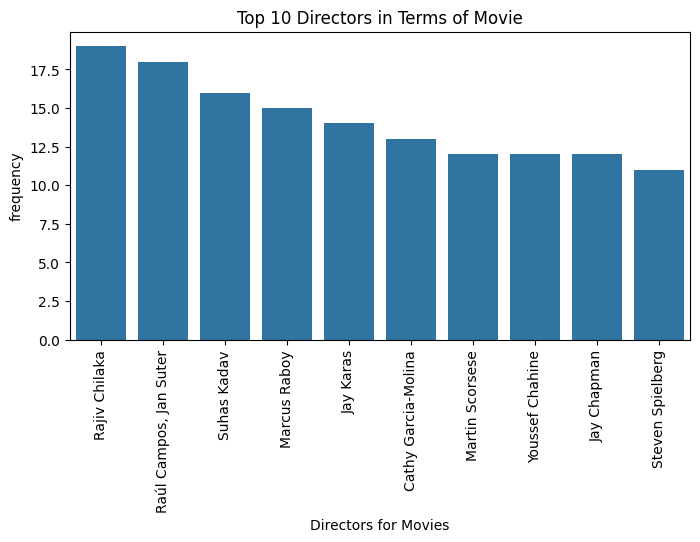

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=directors_Movie.index, y=directors_Movie.values)
plt.xlabel('Directors for Movies')
plt.ylabel('frequency')
plt.xticks(rotation = 90)
plt.title('Top 10 Directors in Terms of Movie')
plt.show()

Rajiv Chilaka is the top director with 19 movies

Which actor acted in most number of films?

we will explode the cast column and find the frequency of the actors

In [ ]:
df_visual['cast'] = df['cast'].str.split(',')

In [ ]:
df_cast = df_visual.explode(column='cast')

In [ ]:
actors_count = df_cast['cast'].value_counts()[:15]
actors_count

cast
 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
 Rajesh Kava         26
Shah Rukh Khan       26
 Yuki Kaji           25
 Paresh Rawal        25
 Andrea Libman       25
 Boman Irani         25
 Vincent Tong        24
Akshay Kumar         23
 Jigna Bhardwaj      23
 Fred Tatasciore     21
Name: count, dtype: int64

Top 15 actors with the data given in column cast

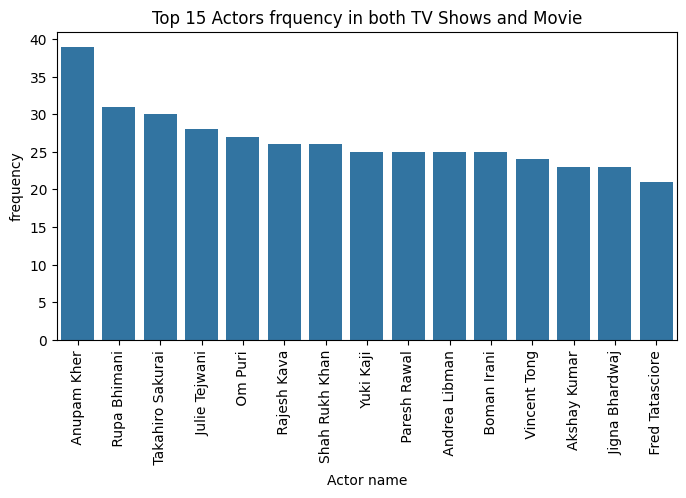

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=actors_count.index, y=actors_count.values)
plt.xlabel('Actor name')
plt.ylabel('frequency')
plt.xticks(rotation = 90)
plt.title('Top 15 Actors frquency in both TV Shows and Movie')
plt.show()

It seems Anupam Kher acted in most number of movies with the total of 39. It resembles he is most reputed actor in the respective industry

Which country has most number of movies and Tv shows?

---

In [ ]:
country_count = df_con['country'].value_counts()[:10]
country_count

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

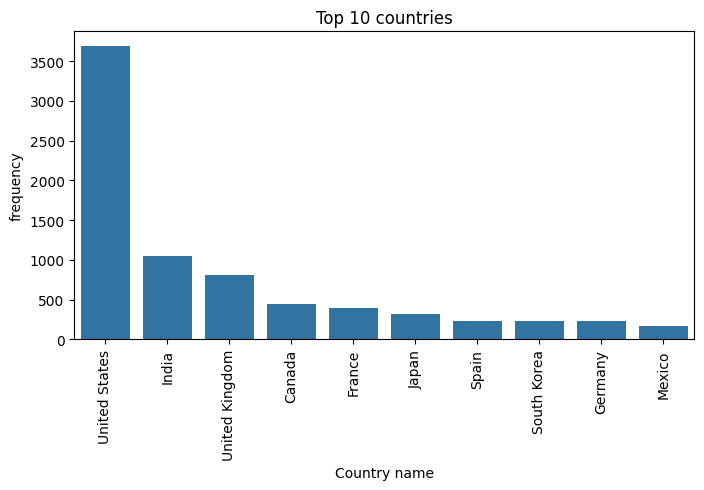

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=country_count.index, y=country_count.values)
plt.xlabel('Country name')
plt.ylabel('frequency')
plt.xticks(rotation = 90)
plt.title('Top 10 countries')
plt.show()

In [ ]:
#analysis for movies
country_count_movie = df_con[df_con['type'] =='Movie']['country'].value_counts()[:10]
country_count_movie

country
United States     2752
India              962
United Kingdom     534
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: count, dtype: int64

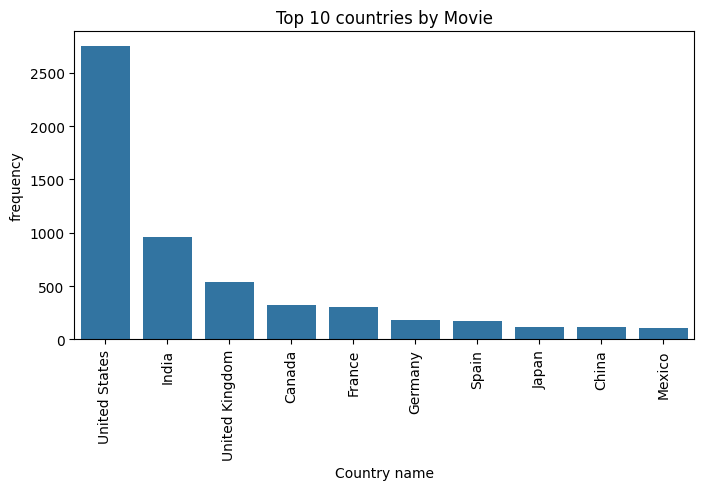

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=country_count_movie.index, y=country_count_movie.values)
plt.xlabel('Country name')
plt.ylabel('frequency')
plt.xticks(rotation = 90)
plt.title('Top 10 countries by Movie')
plt.show()

Here we have USA with more number of releases in Netflix

In [ ]:
#analysis for TV Shows
country_count_TV = df_con[df_con['type'] =='TV Show']['country'].value_counts()[:10]
country_count_TV

country
United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Name: count, dtype: int64

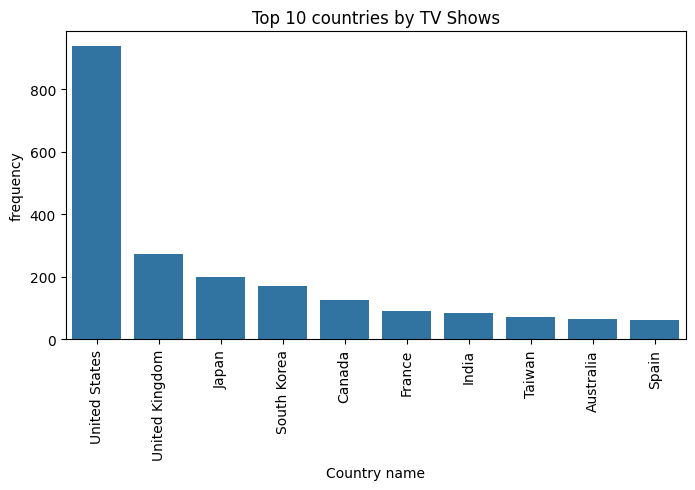

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=country_count_TV.index, y=country_count_TV.values)
plt.xlabel('Country name')
plt.ylabel('frequency')
plt.xticks(rotation = 90)
plt.title('Top 10 countries by TV Shows')
plt.show()

Intrestingly here in TV shows India is lagging more on compared to Movies. India is at 7th place in terms of Tv shows and 2nd in Movies


**What is the count of movies or TV Shows that added in the netflix based on date added? **

---

here we are extracting year from the datetime column and finding the frequency of movies added to Netflix on which year.

In [ ]:
df_visual['date_added_year']=df_visual['date_added'].dt.year
df_visual['date_added_year'] = df_visual['date_added_year'].fillna(0).astype(int)


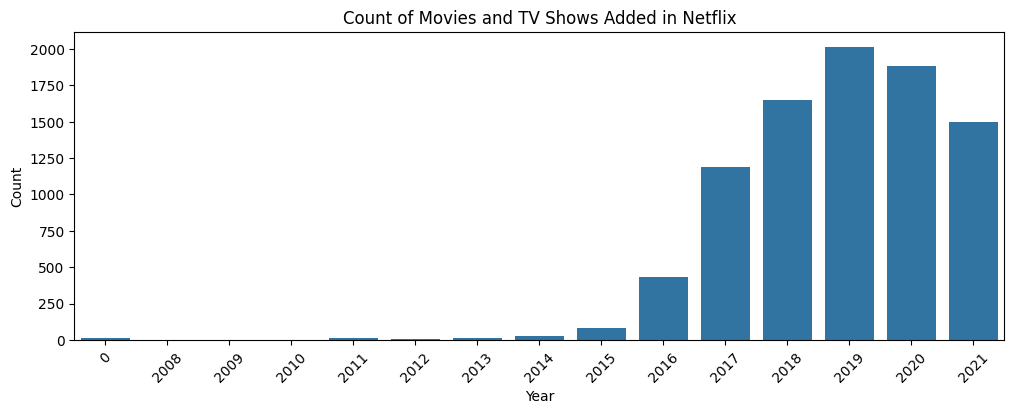

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data = df_visual, x = 'date_added_year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title('Count of Movies and TV Shows Added in Netflix')
plt.show()

-- Here we can see rapid increase in addition of movies and TV Shows from 2016 and going on lets see individual analysis of Movies and TV Shows seperately

-- Here 0 says the null values we filled it with zero

How is the release year frequency distributed?

---

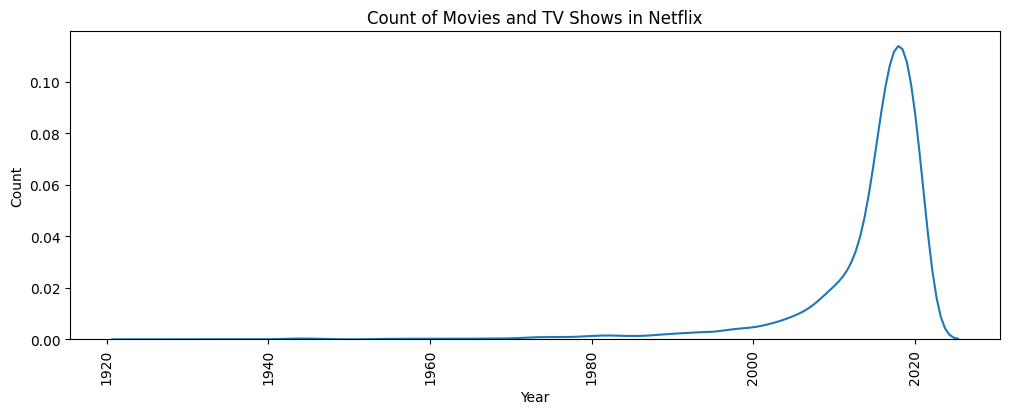

In [ ]:
plt.figure(figsize=(12, 4))
sns.kdeplot(data = df_visual, x = 'release_year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Count of Movies and TV Shows in Netflix')
plt.show()

-- Here maximum release year of movies and TV Shows are in the year of 2018

-- movies release years are ranging from 1925 to 2021

In [ ]:
df_movie = df_visual[df_visual['type'] == 'Movie']
df_TV = df_visual[df_visual['type'] == 'TV Show']

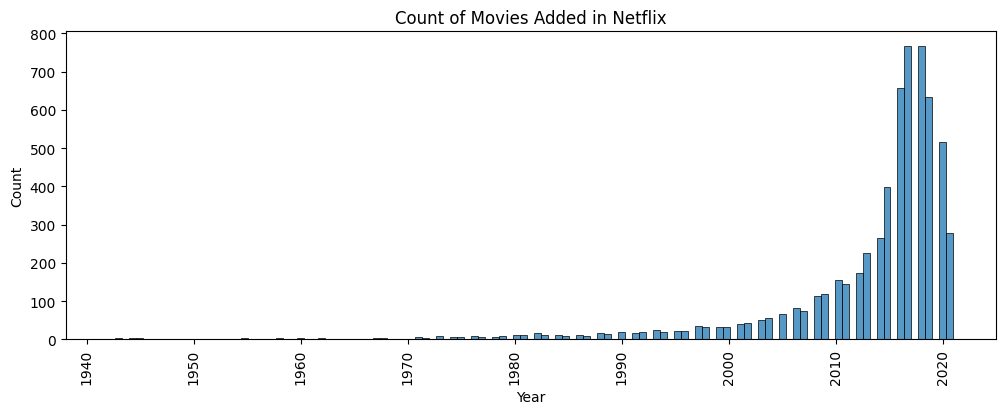

In [ ]:
# release years of movies

plt.figure(figsize=(12, 4))
sns.histplot(data = df_movie, x = 'release_year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Count of Movies Added in Netflix')
plt.show()

-- First movie was added in 1942 in Netflix

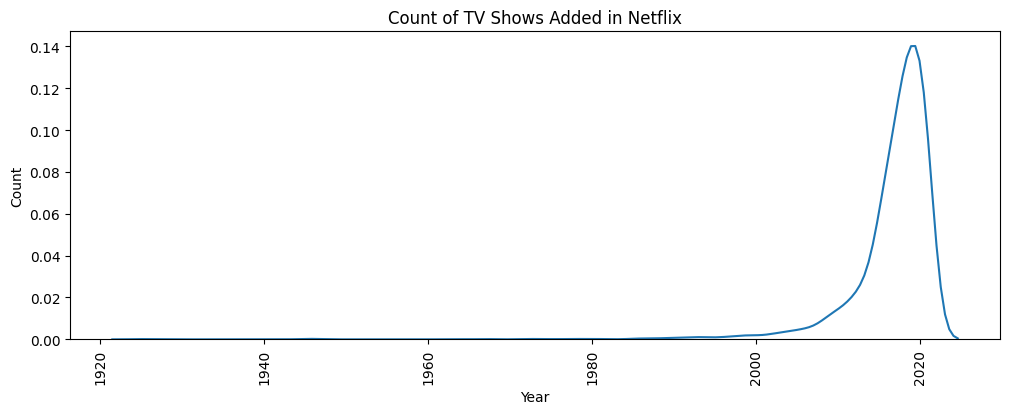

In [ ]:
# release years of movies

plt.figure(figsize=(12, 4))
sns.kdeplot(data = df_TV, x = 'release_year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Count of TV Shows Added in Netflix')
plt.show()

What is the top rated content in ratings?

---

In [ ]:
rating_count = df_visual['rating'].value_counts()[:10]
rating_count

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

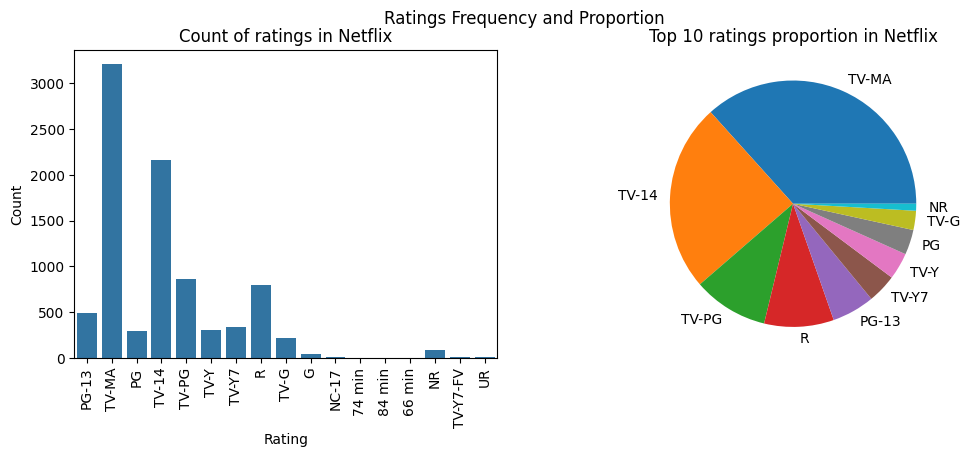

In [ ]:
# ratings of movies

fig = plt.figure(figsize=(12, 4))

plt.suptitle('Ratings Frequency and Proportion')

plt.subplot(1,2,1)
sns.countplot(data = df_visual, x = 'rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Count of ratings in Netflix')

plt.subplot(1,2,2)
plt.pie(rating_count.values, labels = rating_count.index,startangle =0)
plt.title('Top 10 ratings proportion in Netflix')
plt.show()

-- Most of the Netflix content is of type **TV-MA** (may be unsuitable for children under 17 )

-- it seems most of the most of the content is occupied by **TV-MA, TV-14**

What are the top listed genres in the dataset?

---

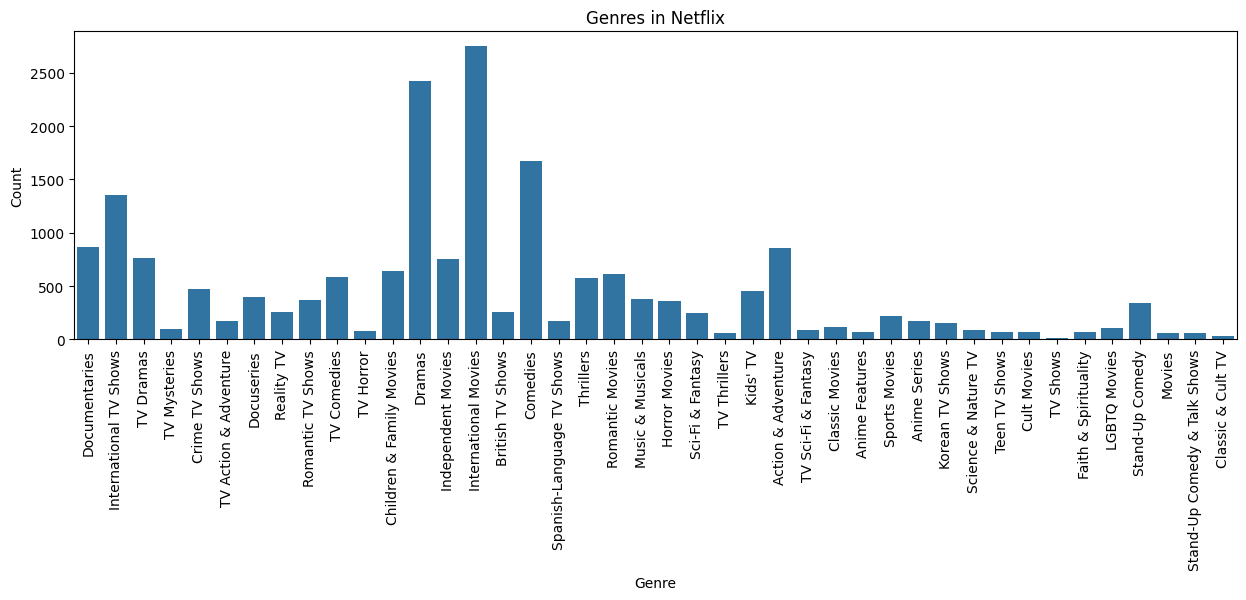

In [ ]:

fig = plt.figure(figsize=(15, 4))
sns.countplot(data = df_genre, x = 'listed_in')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Genres in Netflix')
plt.show()


-- Most of the movies are listed in the genre of International Movies and Dramas

**DONE ...! Univariate Analysis**

## **BIVARIATE ANALYSIS**

In [ ]:
df_visual.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,lead_actor,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",None,2021
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",Ama Qamata,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,Sami Bouajila,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",None,2021
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,Mayur More,2021


**Country vs Type**

---

In [ ]:
coun_counts = df_con['country'].value_counts()[:12]
coun_counts

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Name: count, dtype: int64

In [ ]:
df_con.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,lead_actor
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,Sami Bouajila
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,Mayur More


In [ ]:
df_con.dropna(inplace =True)

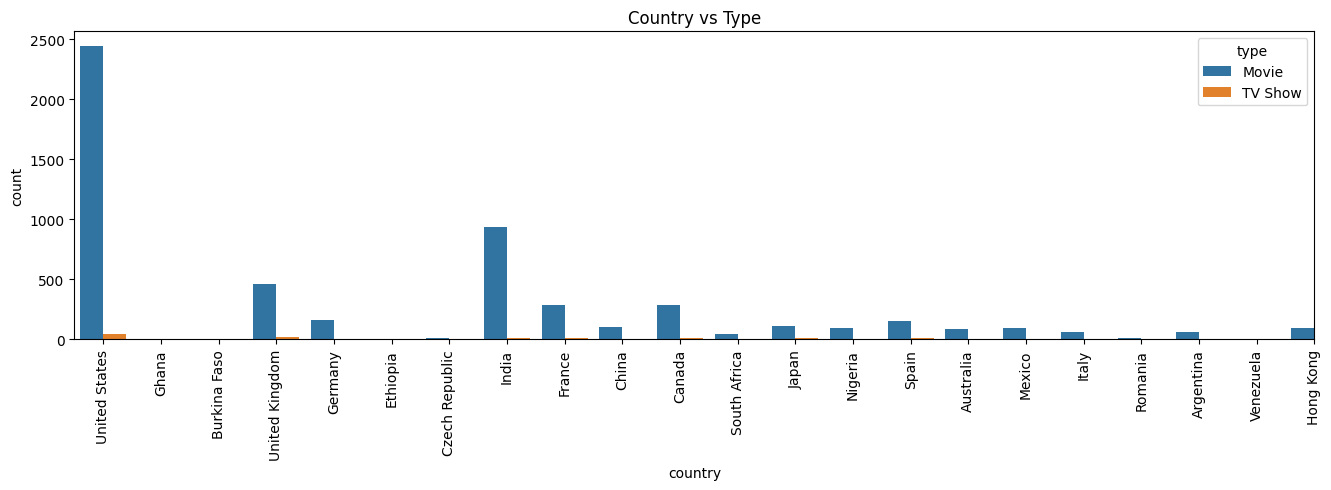

In [ ]:
plt.figure(figsize=(16, 4))
sns.countplot(data = df_con, x='country',hue = 'type',orient ='h')
plt.xticks(rotation =90)
plt.xlim(right = 'Hong Kong')
plt.title('Country vs Type')
plt.show()

-- It seems movies are good in number but when in terms of TV Shows there is large scope for addition

**DATE_ADDED VS TYPE**

---

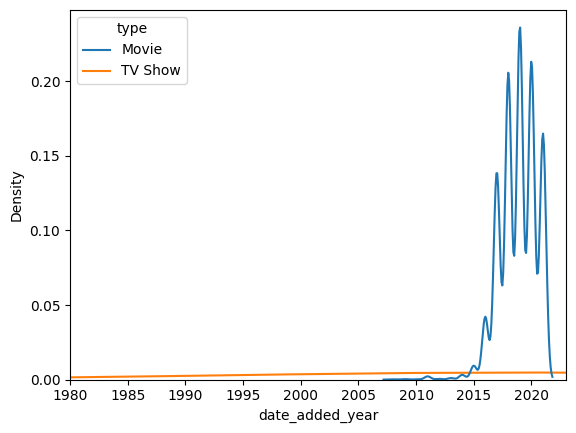

In [ ]:
sns.kdeplot(data=df_visual, x="date_added_year", hue="type")
plt.xlim(left = 1980,right = 2023)
plt.show()

-- It seems most of the movie distribution is right skewed but for TV Show it is uniformly distributed.

What is the best time to launch a TV Show?

In [ ]:
df_visual['date_added_month'] =df_visual['date_added'].dt.month_name()

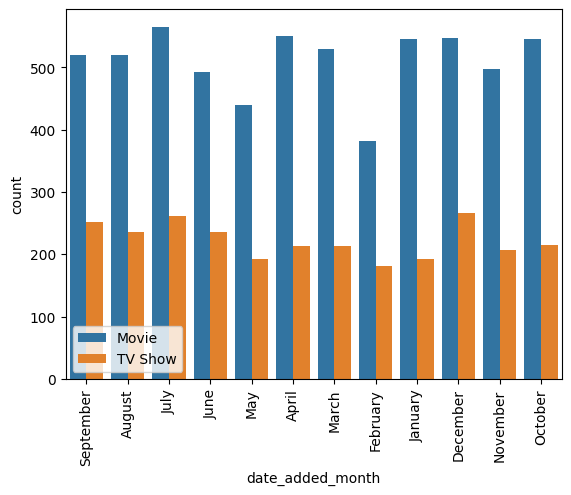

In [ ]:
sns.countplot(data=df_visual, x="date_added_month", hue="type",orient = 'h')
plt.legend(loc='lower left')
plt.xticks(rotation = 90)
plt.show()

-- For TV Show the best time to add is **December**

-- For Movie the most number of movies added is on **July**

In [ ]:
df_visual.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,lead_actor,date_added_year,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",None,2021,September
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",Ama Qamata,2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,Sami Bouajila,2021,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",None,2021,September
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,Mayur More,2021,September


In [ ]:
df_listed.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


where does most of the data added in netflix based on genre?

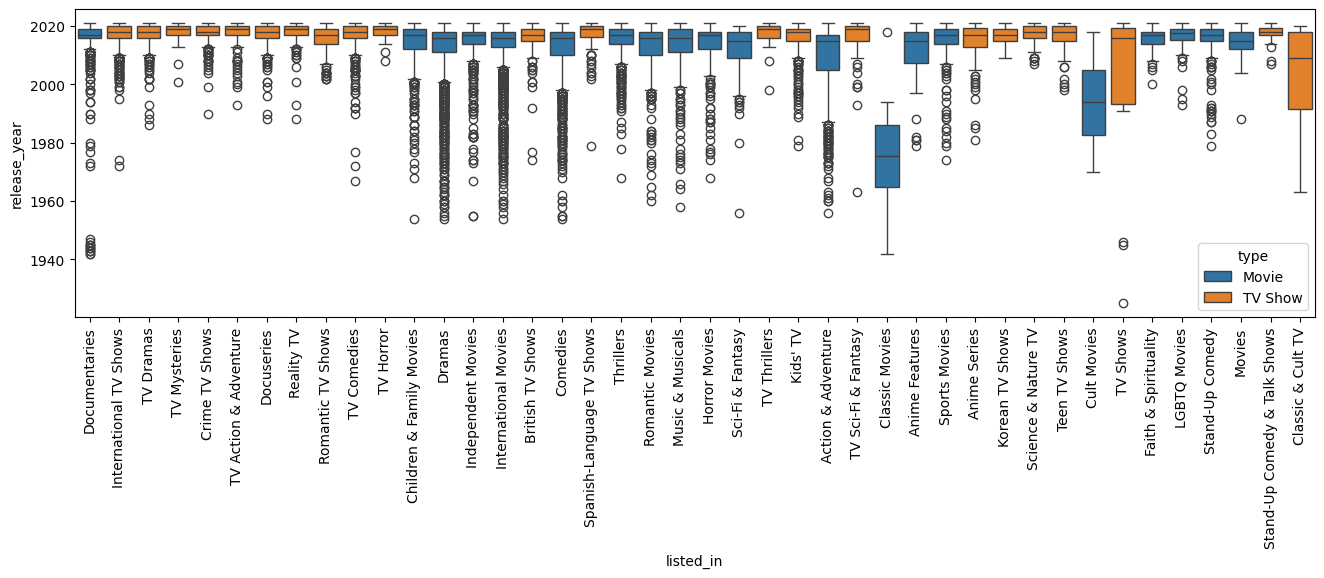

In [ ]:
plt.figure(figsize = (16,4))
sns.boxplot(data=df_listed, x="listed_in", y="release_year",hue = 'type')
plt.xticks(rotation = 90)
plt.show()

-- Most of the movie release years for all the genre has a median above 2010 except for two genres **Classic Movies, Cult Movies**

-- All the genres in the TV Shows Have the median of above 2000 it showed that there is an increased viewers for TV Shows,even the min value is above 2000 it shows almost all the TV shows released above 2000

**Duration of movies Vs Release Year**

---

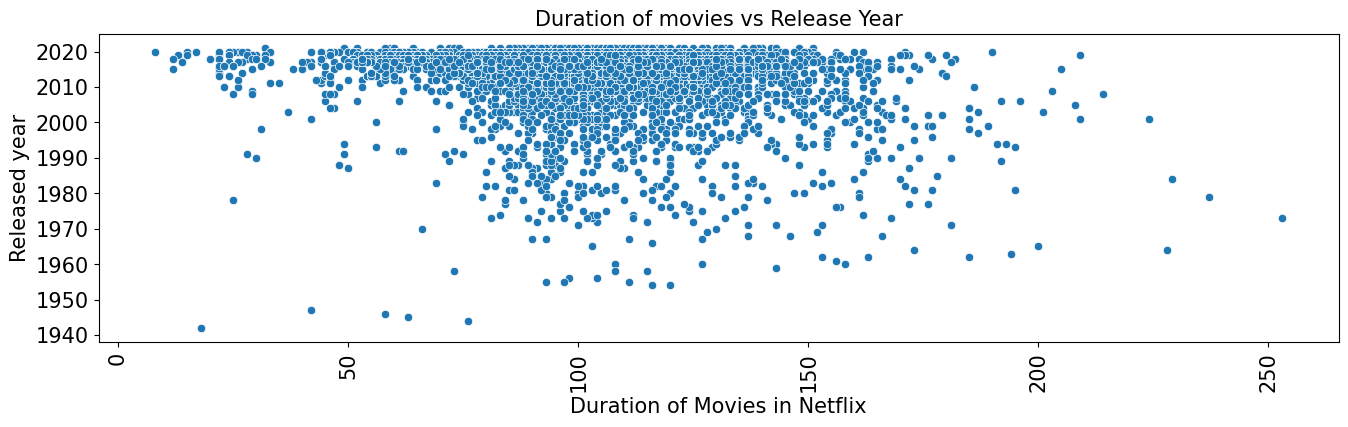

In [ ]:
df_movie.dropna(inplace = True)
df_movie['duration_minutes'] =  df_movie['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(16,4))
sns.scatterplot(x='duration_minutes', y='release_year',data=df_movie)
plt.xticks(fontsize=15,rotation =90)
plt.yticks(fontsize=15)
plt.xlabel('Duration of Movies in Netflix',fontsize=15)
plt.ylabel('Released year',fontsize=15)
plt.title('Duration of movies vs Release Year', fontsize=15)
plt.show()

-- most of the movies duration is between 90 to 150 minutes for movies

Tv Shows seasons Vs Release Year

---

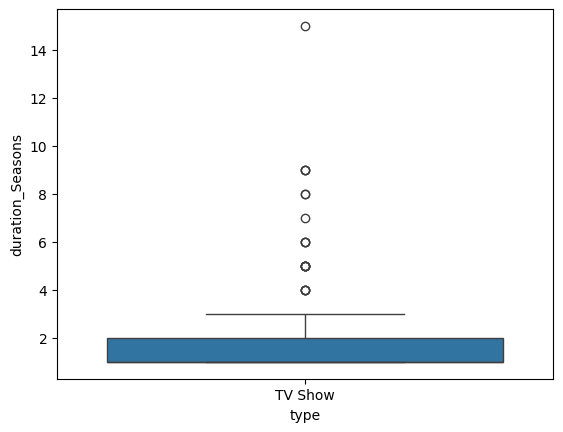

In [ ]:
df_TV.dropna(inplace = True)
df_TV['duration_Seasons'] =  df_TV['duration'].str.replace(r'season[s]?', '', case=False, regex=True).astype(int)
sns.boxplot(data=df_TV, x="type", y="duration_Seasons")
plt.show()

Here we can infer the most of the TV Show are 1 and 2 seasons

**Release year VS date added**

---

find the relation between the release year and the date added?

In [ ]:
df_visual['date_added_year'] =df_visual['date_added_year'].fillna(0).astype(int)

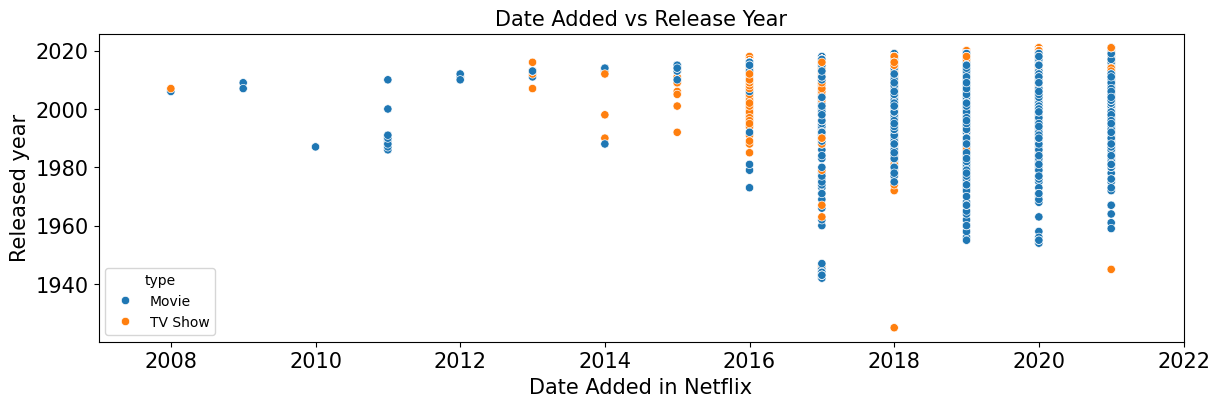

In [ ]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='date_added_year', y='release_year',hue='type',data=df_visual)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(left =2007,right = 2022)
plt.xlabel('Date Added in Netflix',fontsize=15)
plt.ylabel('Released year',fontsize=15)
plt.title('Date Added vs Release Year', fontsize=15)
plt.show()

-- It seems in 2014 to 2016 they dumped most of the Tv Shows in the Netflix

-- After 2018 it seems they started dump the movies in Netflix in large scale

In [ ]:
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  lead_actor        7982 non-null   object        
 13  date_added_year   8807 non-null   int64         
 14  date_added_month  8797 n

**Pairplot for the TV Shows & Movies**

---

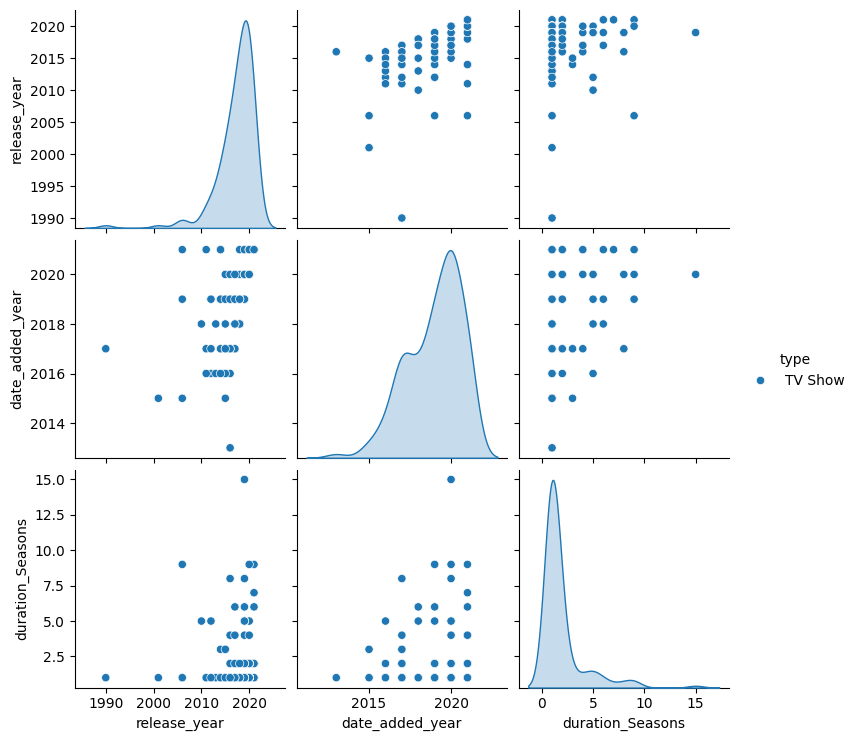

In [ ]:
sns.pairplot(data = df_TV,hue ='type')

-- It seems that data in seasons are rightly skewed and release years are leftly skewed

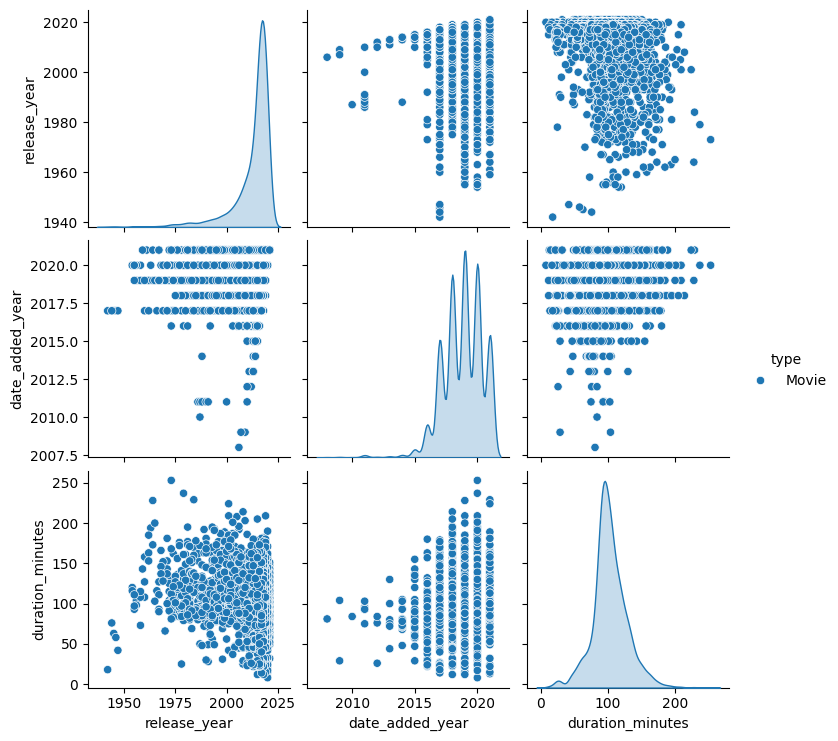

In [ ]:
sns.pairplot(data = df_movie,hue ='type')

-- date added years seems to be continuous but it is categorical so the distribution looks like that

-- Most of the movies duration has 100 minutes as we can see in the distribution

## **Correlation Analysis**

---

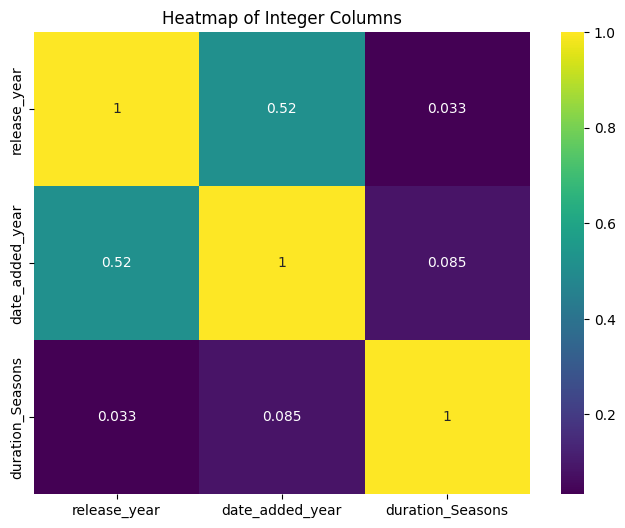

In [ ]:
# Select only integer columns
int_columns = df_TV.select_dtypes(include='int')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(int_columns.corr(), annot=True, cmap='viridis')
plt.title('Heatmap of Integer Columns')
plt.show()

-- In the Tv Shows these columns are not correlated in nature

In [ ]:
df_movie['date_added_month_num'] = df_movie['date_added'].dt.month

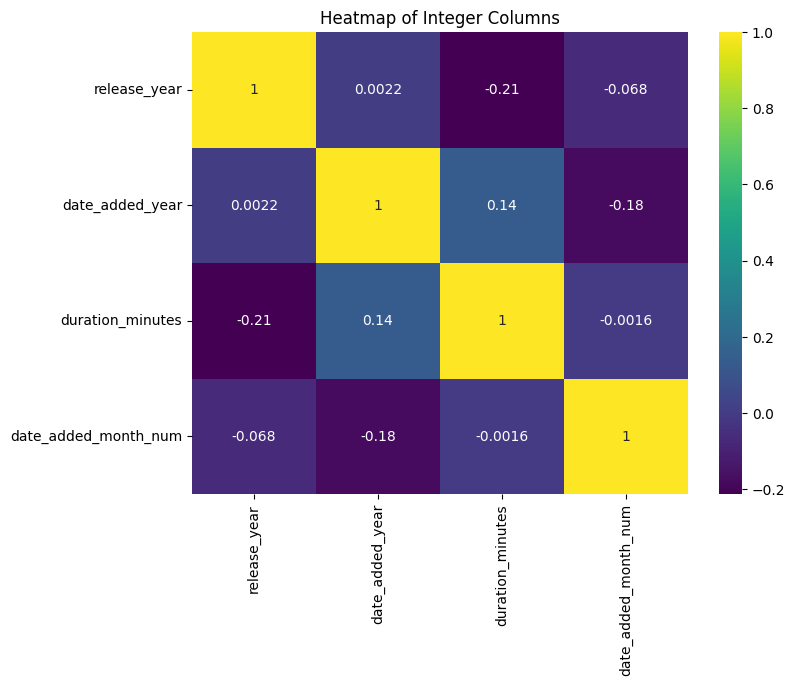

In [ ]:
# Select only integer columns
int_columns = df_movie.select_dtypes(include='int')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(int_columns.corr(), annot=True, cmap='viridis')
plt.title('Heatmap of Integer Columns')
plt.show()


It seems these are absolutely non correlated to each other

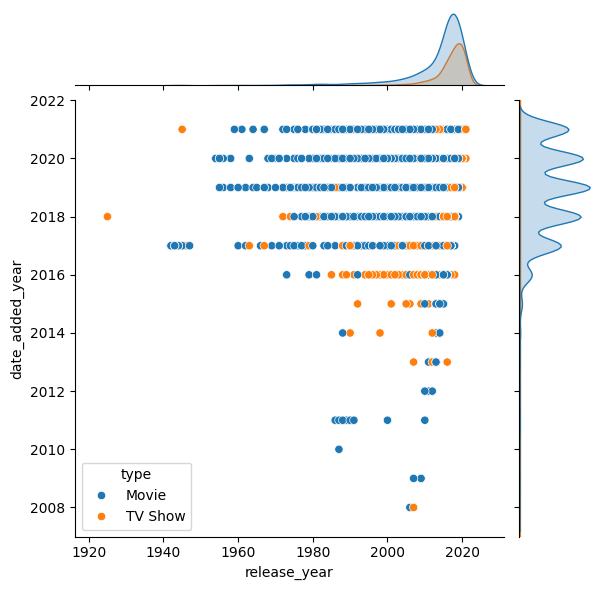

In [ ]:
sns.jointplot(x='release_year', y='date_added_year',hue ='type', data=df_visual)
plt.ylim(bottom = 2007,top = 2022)
plt.show()

----

5. Missing Value & Outlier check (Treatment optional)

---

In [ ]:
# Missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

-- if it is categorical fill it with mode

-- if it is numerical fill it with mean or median by checking the skewness

-- df_listed means we exploded the column listed_in

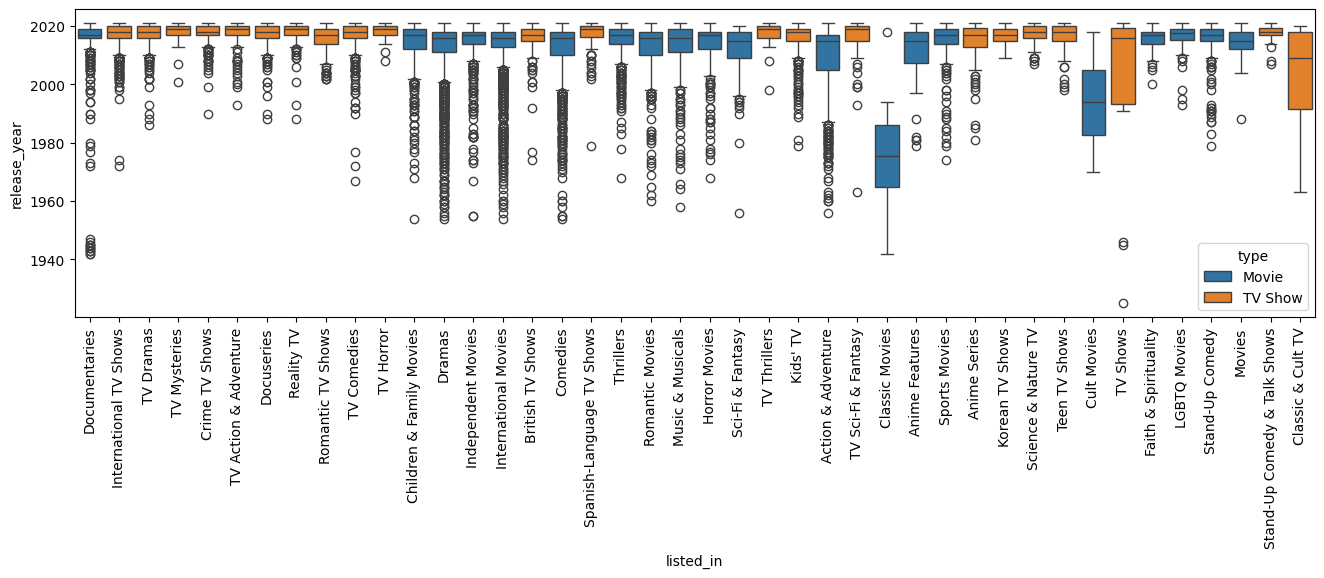

In [ ]:
plt.figure(figsize = (16,4))
sns.boxplot(data=df_listed, x="listed_in", y="release_year",hue = 'type')
plt.xticks(rotation = 90)
plt.show()

-- There are lot of outliers in the data no need to change anything as it is important data about when it is released.

---

**6. Insights based on Non-Graphical and Visual Analysis**

---

Comments about range of the columns

In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
df['title'].nunique()

8807

there are unique titles

In [ ]:
df['director'].nunique()

4528

-- there about 4528 directors

-- df_country is after we exploded the country column

In [ ]:
df_country['country'].nunique()

123

- there are about 121 countries, NAN values and '' values

In [ ]:
print('oldest_date',df['date_added'].min())
print('earliest_date',df['date_added'].max())

oldest_date 2008-01-01 00:00:00
earliest_date 2021-09-25 00:00:00


In [ ]:
print('oldest_release_year :',df['release_year'].min())
print('earliest_release_date :',df['release_year'].max())

oldest_release_year : 1925
earliest_release_date : 2021


earliest movie or Tv Show that is in Netflix is of 1925

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df['rating'].nunique()

17

There are total of 13 rating categories , three are unreliable categories ,and one contains NAN values


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df[df['type'] == 'Movie']['duration'].nunique()

205

-- It contains duration minutes for movie type

-- It contains seasons for TV Show type

In [ ]:
df_listed['listed_in'].value_counts()

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

it contains most movies or Tv Shows in the genre of International movies

Summary :-

Netflix added more movies as compare to TV shows
Content for United States on netflix is maximum as compare to other countries.

Netflix content is mostly availabe for adults only
Most popular genres in recent years are International movies, Dramas, Comedies, International TV Shows and Action & Adventure.

In 2021 , there is significant amount of drop in content added due to COVID pandemic. *Most of viewers of Netflix is from United States followed by India & United Kingdom

Movies:-

In United States , India and United kingdom movies are more popular as comapre to other countires

Almost same no. of movies are added on netflix every month.

Mostly movies are of "100 min" duration.

Top people casted in Movies are from India.

"Rajiv Chilakaa" is the most famous director among all.

TV Shows :-

TV Shows mostly are having season 1 and season 2 respectively.

For Japan and South Korea, netflix should focus more on TV showes as compare to movies

Recommendations :

Movies :-

Preferd movies duration is between 90-100 minutes.

Netflix should add more movies for United States and India having rating of TV-MA & TV-14.

Top three countries where movies added are United States, India & United Kingdom.

Netflix should add TV Show in December.

TV Show:-

Prefered TV Shows duration is 1-2 seasons.

As per 2021 data, count of TV showes are more than movies , this means people wants more web-series as they have for leisure time may be due to work from home scenario.